<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working in IBM Cloud Watson Studio, please replace the command for installing nbformat from `!pip install nbformat==4.2.0` to simply `!pip install nbformat`


In [1]:
!pip install yfinance==0.1.67
!mamba install bs4==4.10.0 -y
!pip install nbformat==4.2.0

'mamba' is not recognized as an internal or external command,
operable program or batch file.


  Attempting uninstall: nbformat
    Found existing installation: nbformat 5.1.3
    Uninstalling nbformat-5.1.3:
      Successfully uninstalled nbformat-5.1.3


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
nbconvert 6.1.0 requires nbformat>=4.4, but you have nbformat 4.2.0 which is incompatible.
nbclient 0.5.3 requires nbformat>=5.0, but you have nbformat 4.2.0 which is incompatible.
conda-repo-cli 1.0.4 requires nbformat>=4.4.0, but you have nbformat 4.2.0 which is incompatible.
anaconda-client 1.9.0 requires nbformat>=4.4.0, but you have nbformat 4.2.0 which is incompatible.


In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Define Graphing Function


In this section, we define the function `make_graph`. You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.


In [3]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [4]:
tesla = yf.Ticker("TSLA")
tesla.analysis

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [5]:
tesla_data = tesla.history(period='max')
tesla_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0,0.0
2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0,0.0
2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0,0.0
2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0,0.0
2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0,0.0
...,...,...,...,...,...,...,...
2023-09-18,271.160004,271.440002,263.760010,265.279999,101543300,0,0.0
2023-09-19,264.350006,267.850006,261.200012,266.500000,103704000,0,0.0
2023-09-20,267.040009,273.929993,262.459991,262.589996,122514600,0,0.0


**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [6]:
tesla_data.reset_index(inplace=True)
tesla_data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0,0.0
...,...,...,...,...,...,...,...,...
3327,2023-09-18,271.160004,271.440002,263.760010,265.279999,101543300,0,0.0
3328,2023-09-19,264.350006,267.850006,261.200012,266.500000,103704000,0,0.0
3329,2023-09-20,267.040009,273.929993,262.459991,262.589996,122514600,0,0.0
3330,2023-09-21,257.850006,260.859985,254.210007,255.699997,119531000,0,0.0


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [7]:
response = requests.get("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm")

Parse the html data using `beautiful_soup`.


In [8]:
soup = BeautifulSoup(response.text,'html.parser')

Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [9]:
tesla_revenue = pd.read_html('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm')
tesla_revenue = pd.DataFrame(tesla_revenue[0])
tesla_revenue.columns = ['Date','Revenue']
tesla_revenue

,Date,Revenue
0,2021,"$53,823"
1,2020,"$31,536"
2,2019,"$24,578"
3,2018,"$21,461"
4,2017,"$11,759"
5,2016,"$7,000"
6,2015,"$4,046"
7,2014,"$3,198"
8,2013,"$2,013"
9,2012,$413


Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [10]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

C:\Users\saket\AppData\Local\Temp/ipykernel_22312/349343550.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")


Execute the following lines to remove an null or empty strings in the Revenue column.


In [11]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
tesla_revenue

,Date,Revenue
0,2021,53823
1,2020,31536
2,2019,24578
3,2018,21461
4,2017,11759
5,2016,7000
6,2015,4046
7,2014,3198
8,2013,2013
9,2012,413


Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [12]:
tesla_revenue.tail()

,Date,Revenue
8,2013,2013
9,2012,413
10,2011,204
11,2010,117
12,2009,112


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [13]:
GameStop = yf.Ticker("GME")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [14]:
gme_data = GameStop.history(period='max')
gme_data.reset_index(inplace=True)
gme_data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0
...,...,...,...,...,...,...,...,...
5435,2023-09-18,17.990000,18.100000,17.350000,17.549999,3694600,0.0,0.0
5436,2023-09-19,17.590000,17.639999,17.129999,17.520000,2584200,0.0,0.0
5437,2023-09-20,17.629999,17.930000,17.450001,17.520000,2129800,0.0,0.0
5438,2023-09-21,17.280001,17.320000,16.650000,17.020000,2910700,0.0,0.0


**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [15]:
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data`.


In [16]:
response = requests.get("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html")

Parse the html data using `beautiful_soup`.


In [17]:
soup = BeautifulSoup(response.text,'html.parser')

Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column using a method similar to what you did in Question 2.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [18]:
gme_revenue = pd.DataFrame(columns=['Date','Revenue'])
gme_revenue


,Date,Revenue


In [25]:
table = soup.find_all("table")[0]
table.find_all("td")

[<td style="text-align:center">2020</td>,
 <td style="text-align:center">$6,466</td>,
 <td style="text-align:center">2019</td>,
 <td style="text-align:center">$8,285</td>,
 <td style="text-align:center">2018</td>,
 <td style="text-align:center">$8,547</td>,
 <td style="text-align:center">2017</td>,
 <td style="text-align:center">$7,965</td>,
 <td style="text-align:center">2016</td>,
 <td style="text-align:center">$9,364</td>,
 <td style="text-align:center">2015</td>,
 <td style="text-align:center">$9,296</td>,
 <td style="text-align:center">2014</td>,
 <td style="text-align:center">$9,040</td>,
 <td style="text-align:center">2013</td>,
 <td style="text-align:center">$8,887</td>,
 <td style="text-align:center">2012</td>,
 <td style="text-align:center">$9,551</td>,
 <td style="text-align:center">2011</td>,
 <td style="text-align:center">$9,474</td>,
 <td style="text-align:center">2010</td>,
 <td style="text-align:center">$9,078</td>,
 <td style="text-align:center">2009</td>,
 <td style="

In [26]:
gme_revenue = pd.DataFrame(columns=['Date', 'Revenue'])

for row in table.find_all("tr"):
    date = None
    revenue = None
    
    cols = row.find_all("td")
    
    if len(cols) >= 2:
        date = cols[0].get_text().strip()
        revenue = cols[1].get_text().strip()
        
        gme_revenue = gme_revenue.append({'Date': date, 'Revenue': revenue}, ignore_index=True)


        
print(gme_revenue)


    Date Revenue
0   2020  $6,466
1   2019  $8,285
2   2018  $8,547
3   2017  $7,965
4   2016  $9,364
5   2015  $9,296
6   2014  $9,040
7   2013  $8,887
8   2012  $9,551
9   2011  $9,474
10  2010  $9,078
11  2009  $8,806
12  2008  $7,094
13  2007  $5,319
14  2006  $3,092
15  2005  $1,843


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [27]:
gme_revenue.tail()

,Date,Revenue
11,2009,"$8,806"
12,2008,"$7,094"
13,2007,"$5,319"
14,2006,"$3,092"
15,2005,"$1,843"


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`. Note the graph will only show data upto June 2021.


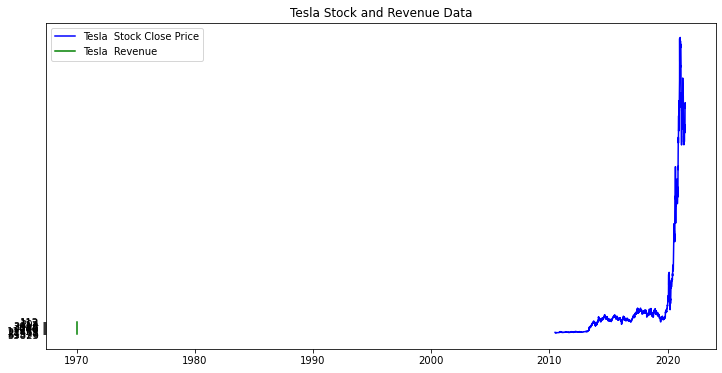

In [30]:
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, title):
    # Assuming the date is a column in both dataframes
    stock_data['Date'] = pd.to_datetime(stock_data['Date'])
    revenue_data['Date'] = pd.to_datetime(revenue_data['Date'])
    
    # Filter data up to June 2021
    stock_data = stock_data[stock_data['Date'] <= '2021-06-30']
    revenue_data = revenue_data[revenue_data['Date'] <= '2021-06-30']

    # Create a new figure
    plt.figure(figsize=(12, 6))

    # Plot Tesla stock data
    plt.plot(stock_data['Date'], stock_data['Close'], label=f'{title[:6]} Stock Close Price', color='blue')

    # Plot Tesla revenue data
    plt.plot(revenue_data['Date'], revenue_data['Revenue'], label=f'{title[:6]} Revenue', color='green')

    # Set plot title
    plt.title(title)

    # Add legend
    plt.legend()

    # Show the graph
    plt.show()

# Call the make_graph function with your data and title
make_graph(tesla_data, tesla_revenue, 'Tesla Stock and Revenue Data')


## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


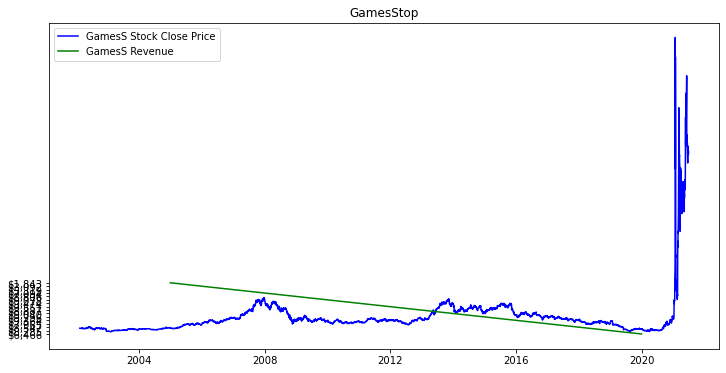

In [31]:
make_graph(gme_data,gme_revenue,"GamesStop")

<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
